In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
from wordcloud import WordCloud


#reading data

df = pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD__Part_I_Crime_2011_to_Present.csv") #Reading the dataset in a dataframe using Pandas

#Here df is the dataframeset

#To see the info of the data frame 
df.info()

#reading data
print("==================================================================")
feature_range = pd.read_csv("/Users/pallavi/Downloads/CleanCrime.csv") #Reading the dataset in a dataframe using Pandas
#Here df is the dataframeset

#To see the info of the data frame 
print(feature_range.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77810 entries, 0 to 77809
Data columns (total 40 columns):
X                             77351 non-null float64
Y                             77351 non-null float64
OBJECTID                      77810 non-null int64
Geocode_Address               77351 non-null object
Geocode_Street                77810 non-null object
Case_Number                   77810 non-null object
OccurredFrom_Date_Year        77810 non-null int64
OccurredFrom_Date_Month       77810 non-null int64
OccurredFrom_Time             77810 non-null int64
OccurredFrom_Timestamp        77810 non-null object
OccurredThrough_Date_Year     77810 non-null int64
OccurredThrough_Date_Month    77810 non-null int64
OccurredThrough_Time          77810 non-null int64
OccurredThrough_Timestamp     77810 non-null object
Reported_Date_Year            77810 non-null int64
Reported_Date_Month           77810 non-null int64
Reported_Time                 77810 non-null int64
Reported_Timest

In [ ]:
df.columns
#To know the labels of the data set 

In [18]:
df.head(5)
#to know top 5 samples of the data

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,-77.626155,43.165928,2001,"147 Spencer St, Rochester, NY, 14608",147 SPENCER ST,2015-00149697,2015,6,635,2015-06-15T06:35:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Street,271.0,Lake,1.0
1,-77.583344,43.164289,2002,"136 Garson Ave, Rochester, NY, 14609",136 GARSON AVE,2017-00057032,2017,3,1323,2017-03-12T13:23:00.000Z,...,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Shotgun,* No Larceny Type Specified *,Yard,297.0,Clinton,7.0
2,-77.628695,43.154512,2003,"38 Jefferson Ave, Rochester, NY, 14611",38 JEFFERSON AVE,2016-00144426,2016,5,1700,2016-05-11T17:00:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,213.0,Genesee,3.0
3,-77.646162,43.127395,2004,"170 Virginia Ave, Rochester, NY, 14619",170 VIRGINIA AVE,2011-00395358,2011,12,2138,2011-12-17T21:38:00.000Z,...,Robbery,Robbery 1st: Displays What Appears To Be a Fir...,3,Completed,Semiautomatic Handgun,* No Larceny Type Specified *,Parking Lot,243.0,Genesee,3.0
4,-77.646162,43.127395,2005,"170 Virginia Ave, Rochester, NY, 14619",170 VIRGINIA AVE,2013-00364264,2013,12,1400,2013-12-23T14:00:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,243.0,Genesee,3.0


In [3]:
df.tail(5)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
77805,-77.560987,43.158347,77806,"90 Indiana St, Rochester, NY, 14609",90 INDIANA ST,2014-00182890,2014,7,215,2014-07-14T02:15:00.000Z,...,Motor Vehicle Theft,Grand Larceny 4th: Motor Vehicle Value Exceeds...,7,Completed,* No Weapon Specified *,Motor Vehicle Theft,Street,235.0,Goodman,5.0
77806,-77.598251,43.137591,77807,"180 Benton St, Rochester, NY, 14620",180 BENTON ST,2014-00182364,2014,7,1030,2014-07-13T10:30:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,265.0,Goodman,5.0
77807,-77.603208,43.134381,77808,"71 Gregory Hill Rd, Rochester, NY, 14620",71 GREGORY HILL DR,2014-00182214,2014,7,1500,2014-07-11T15:00:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,265.0,Goodman,5.0
77808,-77.657203,43.160511,77809,"49 Wetmore Park, Rochester, NY, 14606",49 WETMORE PARK,2014-00181421,2014,7,2000,2014-07-11T20:00:00.000Z,...,Burglary,Burglary 2nd: Illegal Entry: Dwelling ...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Single Family Home,281.0,Lake,1.0
77809,-77.627913,43.191974,77810,"52 Gorsline St, Rochester, NY, 14613",52 GORSLINE ST,2014-00180673,2014,7,2129,2014-07-11T21:29:00.000Z,...,Aggravated Assault,Menacing 2nd: Weapon ...,4,Completed,Knife/Cutting Instrument,* No Larceny Type Specified *,Multiple Dwelling,231.0,Lake,1.0


In [5]:
print("Describing the features of the dataset")
df.describe()

Describing the features of the dataset


,X,Y,OBJECTID,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Reported_Date_Year,Reported_Date_Month,Reported_Time,Statute_Section,Statute_Degree,Statute_CrimeCategory,Geo_Beat,Geo_Section_Num
count,77351.000000,77351.000000,77810.00000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.000000,77810.00000,77810.000000,77810.000000,77344.000000,77344.000000
mean,-77.611666,43.165020,38905.50000,2013.789898,6.725485,1348.990772,2013.795682,6.722671,1285.426333,2013.800681,6.724457,1335.464439,149.81790,1.366033,5.472317,239.288452,4.654479
std,0.026798,0.022933,22461.95656,2.048968,3.303609,669.841898,2.079465,3.304512,624.158968,2.080534,3.306603,581.914879,11.20397,1.494634,0.999729,26.064842,2.676413
min,-77.701497,43.106066,1.00000,2011.000000,1.000000,0.000000,1920.000000,1.000000,0.000000,1920.000000,1.000000,0.000000,120.00000,0.000000,1.000000,201.000000,1.000000
25%,-77.633512,43.148820,19453.25000,2012.000000,4.000000,915.000000,2012.000000,4.000000,830.000000,2012.000000,4.000000,945.000000,140.25000,0.000000,5.000000,217.000000,3.000000
50%,-77.611717,43.164002,38905.50000,2014.000000,7.000000,1430.000000,2014.000000,7.000000,1315.000000,2014.000000,7.000000,1350.000000,155.25000,1.000000,6.000000,235.000000,5.000000
75%,-77.592956,43.178657,58357.75000,2016.000000,9.000000,1900.000000,2016.000000,9.000000,1758.000000,2016.000000,9.000000,1756.000000,155.25000,2.000000,6.000000,261.000000,7.000000
max,-77.537105,43.266234,77810.00000,2018.000000,12.000000,2359.000000,2018.000000,12.000000,2359.000000,2018.000000,12.000000,2359.000000,215.51000,4.000000,7.000000,297.000000,9.000000


In [10]:
print("Checking for any Null values :")
pd.isnull(df).values.any()


Checking for any Null values :


True

In [11]:
print("Finding the count of null values in the police dataset")
pd.isnull(df).sum()



Finding the count of null values in the police dataset


X                             459
Y                             459
OBJECTID                        0
Geocode_Address               459
Geocode_Street                  0
Case_Number                     0
OccurredFrom_Date_Year          0
OccurredFrom_Date_Month         0
OccurredFrom_Time               0
OccurredFrom_Timestamp          0
OccurredThrough_Date_Year       0
OccurredThrough_Date_Month      0
OccurredThrough_Time            0
OccurredThrough_Timestamp       0
Reported_Date_Year              0
Reported_Date_Month             0
Reported_Time                   0
Reported_Timestamp              0
Address_StreetFull              0
Address_City                    0
Address_State                   0
Patrol_Beat                     0
Patrol_Section                  0
Case_Status                     0
Statute_Title                   0
Statute_Section                 0
Statute_Subsection              0
Statute_Degree                  0
Statute_Class                   0
Statute_Catego

In [13]:
print("Total count of Missing values in the police dataset")
pd.isnull(df).sum().sum()

Total count of Missing values in the police dataset


2775

In [6]:
#Extract the individual columns arrays
OccurredFrom_Date_Year=df['OccurredFrom_Date_Year']
Statute_Text=df['Statute_Text']
Weapon_Description=df['Weapon_Description']
Geocode_Street=df['Geocode_Street']
OccurredFrom_Date_Year=df['OccurredFrom_Date_Year']
print("Data Extracted :")


Data Extracted :


In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
count=0;
for index, row in df.iterrows():
    if (pd.isnull(row['Geocode_Address'] )):
         location = geolocator.geocode(row['Geocode_Street'])
         if location is not None:
             latitude = location.latitude
             longitude= location.longitude
             df.set_value(index,'X',latitude)
             df.set_value(index,'Y',longitude)
             df.set_value(index,'Geocode_Address',location)
             print('Street',row['Geocode_Street'])



/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 6 SAWDEY WAY
Street 100 BAUSCH LOMB PL
Street 864 PITTSFORD MENDON ROAD
Street 1200 N KINGS HIGHWAY HGTS
Street 905 UNIVERSITY PARK ROAD
Street 32.5 AUSTIN ST
Street 306 UNIVERSITY PARK ROAD
Street 145 B GIBBS ST
Street 15 HUBBLE PARK
Street 33 WEDGEWOOD PARK
Street 239 SENECA PK WAY
Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 10 CAIRNS ST
Street HOLLENBECK / AVE D
Street 1000 N KINGS HWY
Street 51 A ROWLEY ST
Street 44 SYKES ST
Street 77 SENECA PARK WAY
Street UNKNOWN
Street 444 SWEET ACRES DR
Street 1000 HENRIETTA RD E  
Street 17 N WINTON ROAD
Street 231 ARBORWOOD LA  
Street 940 WINTON N ROAD
Street 8 LUNSFORD LA  
Street 155 BUELL RD  
Street 1 BAUSCH & LOMB PL
Street 1 BAUSCH & LOMB PL
Street 0 BROAD ST E  
Street 2400 HENRIETTA RD W  
Street 76 NORTON VILLAGE LA  
Street 82 C DODGE ST
Street 47 REAR GLASGOW ST
Street 297 REAR WEAVER ST
Street 96 STRATHMORE LA  
Street 150 C GARLAND AVE
Street 109 A BOBRICH

In [9]:
print("Check the missing values after replaceing the longitude and latitude: ")
pd.isnull(df).sum()

Check the missing values after replaceing the longitude and latitude: 


X                             347
Y                             347
OBJECTID                        0
Geocode_Address               347
Geocode_Street                  0
Case_Number                     0
OccurredFrom_Date_Year          0
OccurredFrom_Date_Month         0
OccurredFrom_Time               0
OccurredFrom_Timestamp          0
OccurredThrough_Date_Year       0
OccurredThrough_Date_Month      0
OccurredThrough_Time            0
OccurredThrough_Timestamp       0
Reported_Date_Year              0
Reported_Date_Month             0
Reported_Time                   0
Reported_Timestamp              0
Address_StreetFull              0
Address_City                    0
Address_State                   0
Patrol_Beat                     0
Patrol_Section                  0
Case_Status                     0
Statute_Title                   0
Statute_Section                 0
Statute_Subsection              0
Statute_Degree                  0
Statute_Class                   0
Statute_Catego

Total Crimes :  7
Larceny               46136
Burglary              15244
Aggravated Assault     6541
Robbery                5294
Name: Statute_Text, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


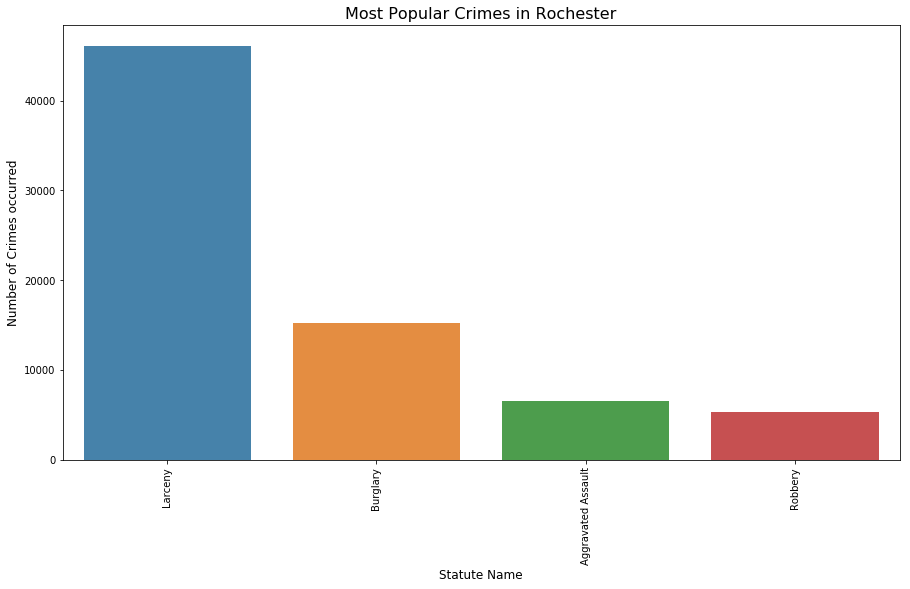

In [7]:
print("Total Crimes : ", len(Statute_Text.unique()))
print(Statute_Text.value_counts().head(4))
crime_name = Statute_Text.value_counts().head(4)
plt.figure(figsize=(15,8))
sns.barplot(x=crime_name.index,y=crime_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Statute Name', fontsize=12)
plt.ylabel('Number of Crimes occurred', fontsize=12)
plt.title("Most Popular Crimes in Rochester", fontsize=16)
plt.show()




Total Crimes :  24
* No Weapon Specified *     66620
Knife/Cutting Instrument     3376
Firearm                      2215
Semiautomatic Handgun        1375
Name: Weapon_Description, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


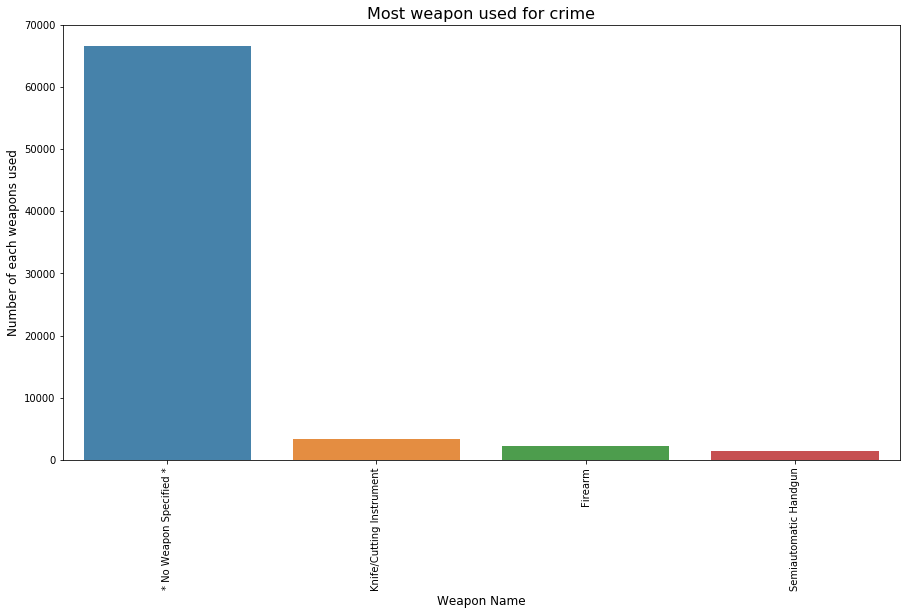

In [62]:
print("Total Crimes : ", len(Weapon_Description.unique()))
print(Weapon_Description.value_counts().head(4))
weapon_name = Weapon_Description.value_counts().head(4)
plt.figure(figsize=(15,8))
sns.barplot(x=weapon_name.index,y=weapon_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Weapon Name', fontsize=12)
plt.ylabel('Number of each weapons used', fontsize=12)
plt.title("Most weapon used for crime", fontsize=16)
plt.show()



Total street:  33051
1490 HUDSON AVE             1805
601 ELMWOOD AVE             1135
710 LAKE AVE                 644
285 UPPER FALLS BLVD         612
500 JOSEPH C WILSON BLVD     592
450 WEST AVE                 492
1750 EAST AVE                360
Name: Geocode_Street, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


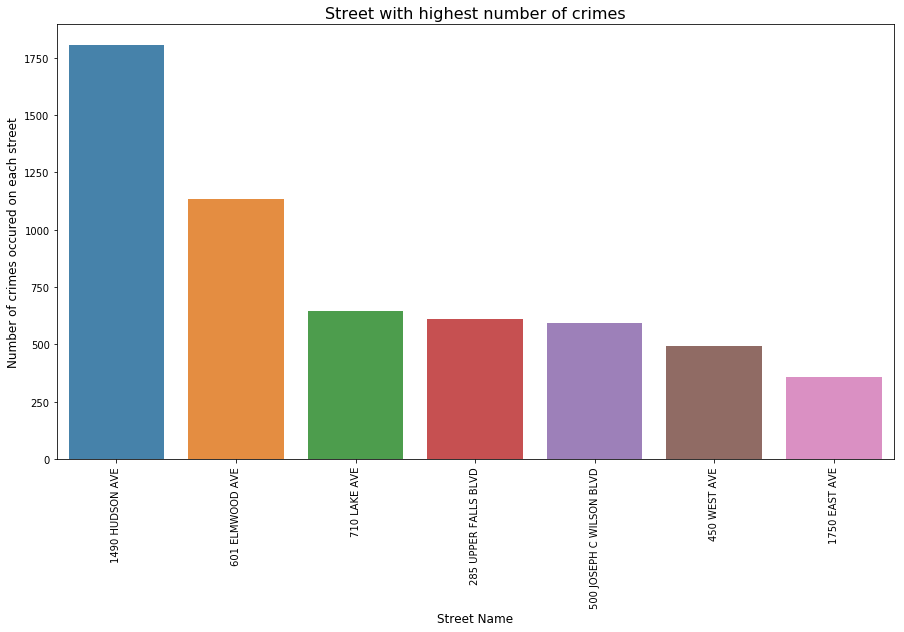

In [67]:
print("Total street: ", len(Geocode_Street.unique()))
print(Geocode_Street.value_counts().head(7))
Geocode_Street_name = Geocode_Street.value_counts().head(7)
plt.figure(figsize=(15,8))
sns.barplot(x=Geocode_Street_name.index,y=Geocode_Street_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Street Name', fontsize=12)
plt.ylabel('Number of crimes occured on each street', fontsize=12)
plt.title("Street with highest number of crimes", fontsize=16)
plt.show()



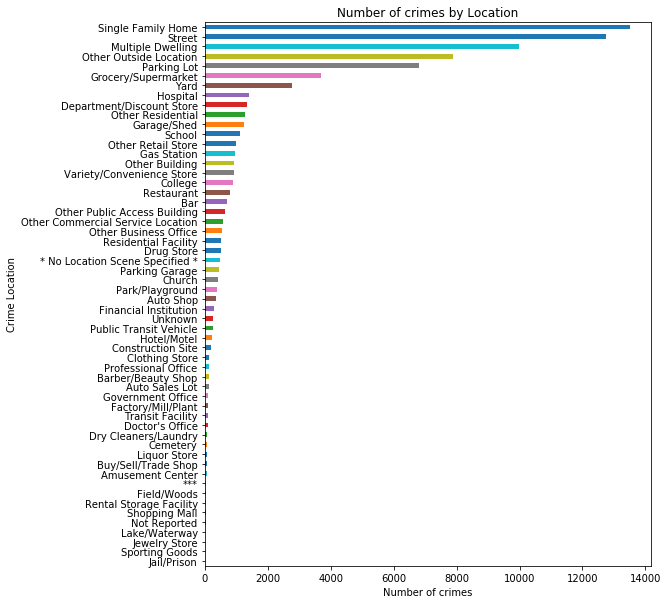

In [26]:
plt.figure(figsize=(8,10))
df.groupby([df['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()


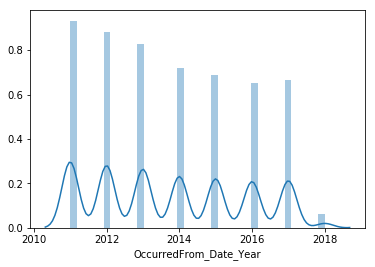

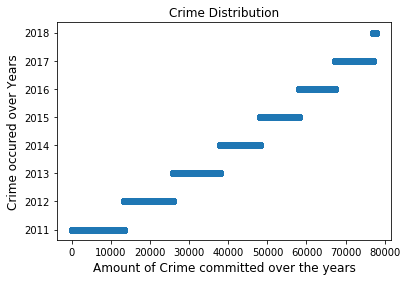

In [26]:
# Distribution of Crime 
sns.distplot(OccurredFrom_Date_Year)
plt.show() 
sortedlist=np.sort(OccurredFrom_Date_Year.values)
plt.scatter(range(df.shape[0]), sortedlist)
plt.xlabel('Amount of Crime committed over the years', fontsize=12)
plt.ylabel('Crime occured over Years', fontsize=12)
plt.title("Crime Distribution")
plt.show()

Total Case Status:  9


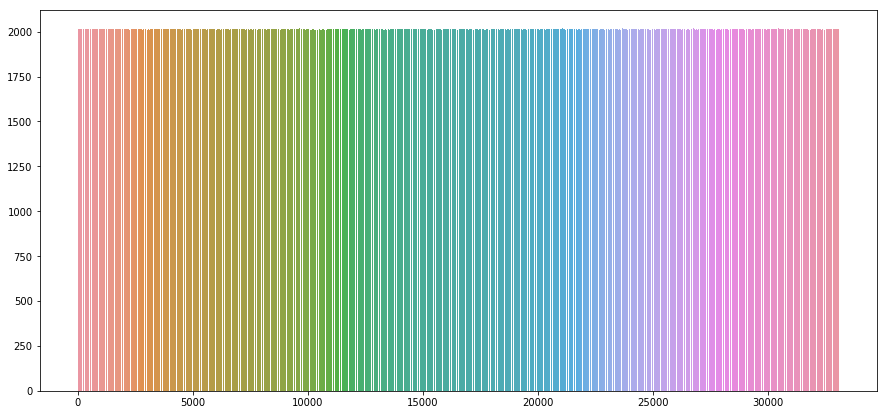

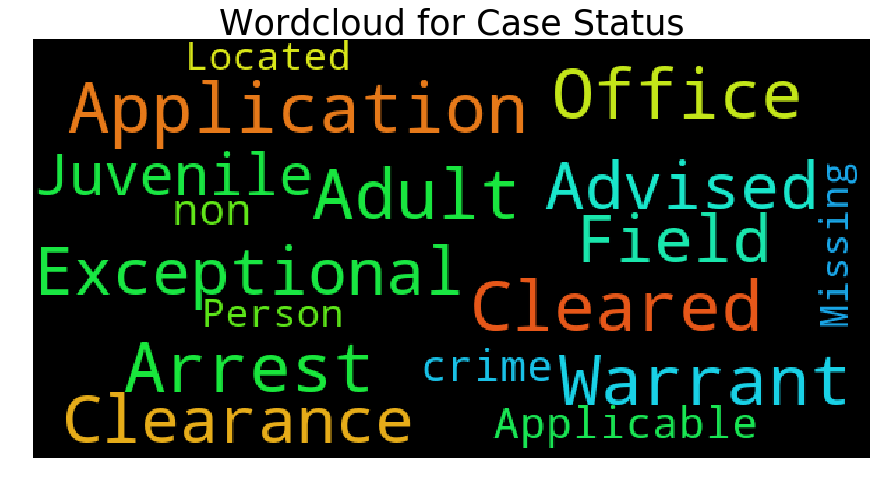

In [12]:
names = df["Case_Status"][~pd.isnull(df["Case_Status"])]
print("Total Case Status: ", len(Case_Status.unique()))
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Case Status", fontsize=35)
plt.axis("off")
plt.show()

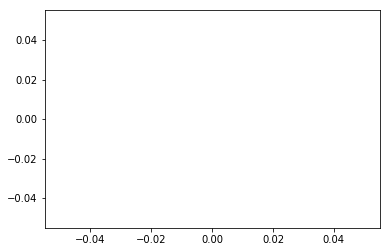

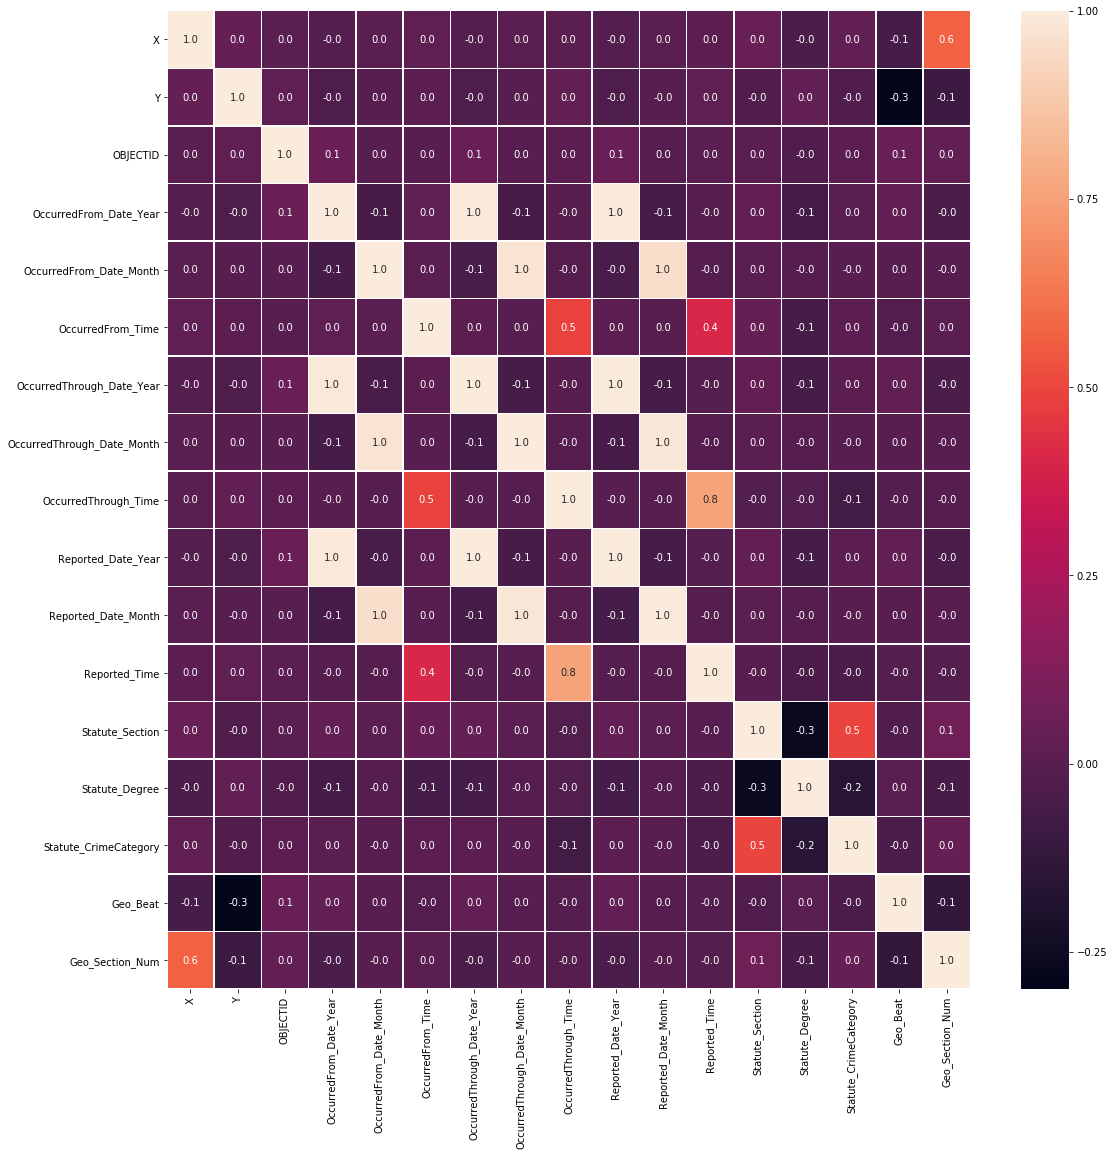

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,X,Y,OBJECTID,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Reported_Date_Year,Reported_Date_Month,Reported_Time,Statute_Section,Statute_Degree,Statute_CrimeCategory,Geo_Beat,Geo_Section_Num
0,-77.626155,43.165928,2001,2015,6,635,2015,6,640,2015,6,829,155.25,0,6,271.0,1.0
1,-77.583344,43.164289,2002,2017,3,1323,2017,3,1323,2017,3,1323,120.14,2,4,297.0,7.0
2,-77.628695,43.154512,2003,2016,5,1700,2016,6,1630,2016,6,1247,155.25,0,6,213.0,3.0
3,-77.646162,43.127395,2004,2011,12,2138,2011,12,2139,2011,12,2139,160.15,1,3,243.0,3.0
4,-77.646162,43.127395,2005,2013,12,1400,2013,12,1500,2013,12,1725,155.25,0,6,243.0,3.0


Numerical distribution of the dataset


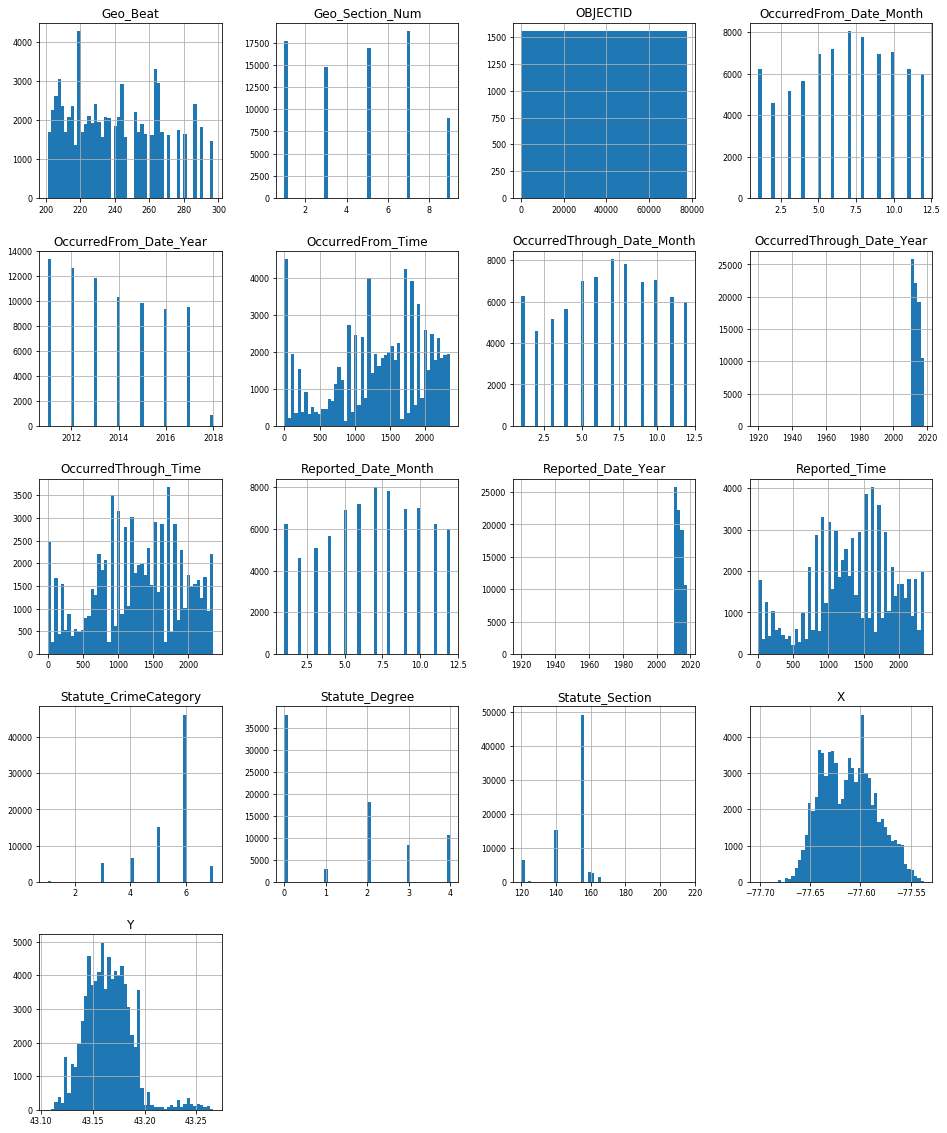

In [11]:
print('Numerical distribution of the dataset')
plt.figure(figsize=(9, 8))
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


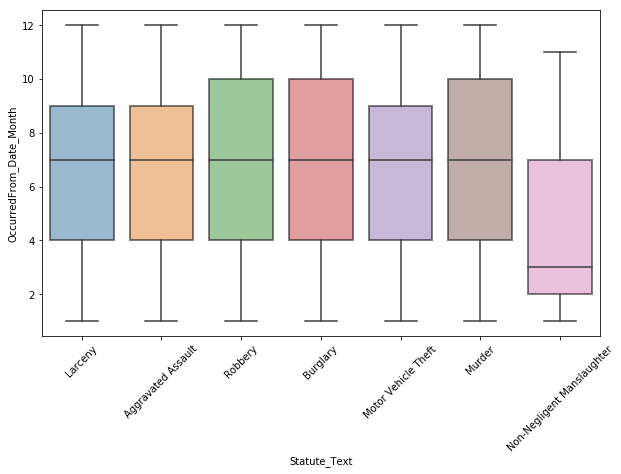

In [7]:
# plt.scatter(df[''], df[''], cmap = 'viridis')
# plt.show()

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Statute_Text', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Statute_Text_OccurredFrom_Date_Month.png')


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


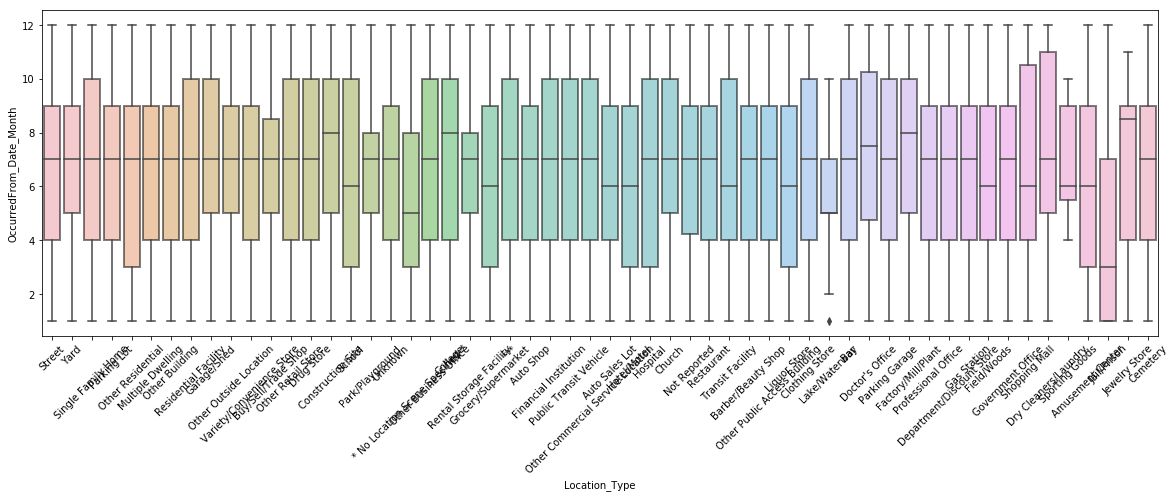

In [8]:
plt.figure(figsize = (20, 6))
ax = sns.boxplot(x='Location_Type', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Location_Type_OccurredFrom_Date_Month.png')

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


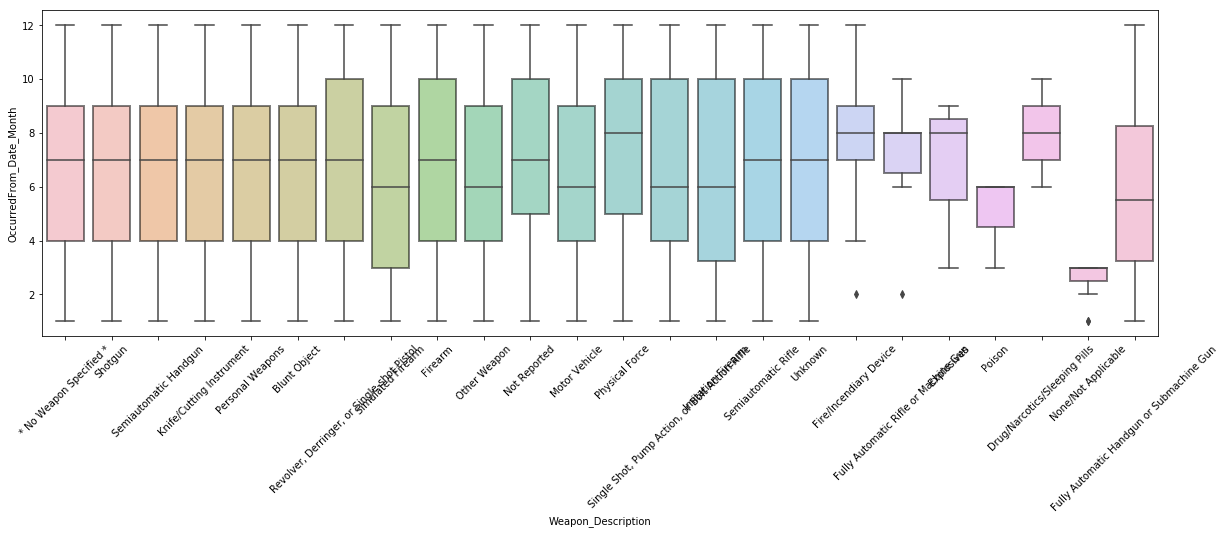

In [9]:

plt.figure(figsize = (20, 6))
ax = sns.boxplot(x='Weapon_Description', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Weapon_Description_OccurredFrom_Date_Month.png')


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


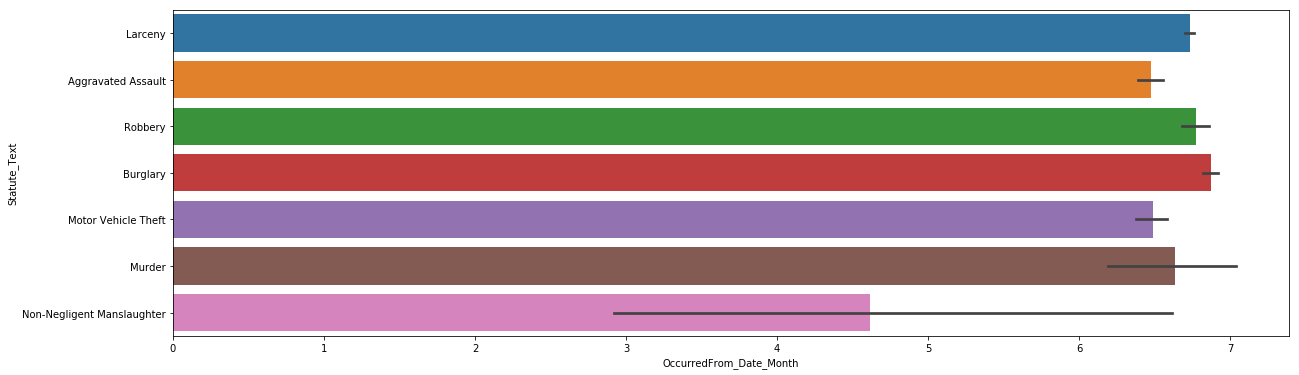

In [32]:
# plt.figure(figsize = (20, 6))
# ax = sns.barplot(x='OccurredFrom_Date_Month', y='Statute_Text', data=df)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.show()
# plt.savefig('Weapon_Description_OccurredFrom_Date_Month.png')

In [3]:
import pandas as pd
df_Personnel= pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RPD_Police_Personnel.csv") #Reading the dataset in a dataframe using Pandas

df_Shooting_Victims=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/Rochester_Shooting_Victims.csv")

df_homicides=pd.read_csv("/Users/pallavi/PycharmProjects/BDAProject/RochesterNY_Homicides.csv")

In [4]:
print('==============================RPD-Personnel=====================================')
df_Personnel.info()
print('==============================RPD-Shooting-Victims==============================')
df_Shooting_Victims.info()
print('==============================RPD-Homicides=====================================')
df_homicides.info()

==============================RPD-Personnel=====================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 16 columns):
OBJECTID           888 non-null int64
Residency          888 non-null object
Full_Name          888 non-null object
Sex                888 non-null object
Race               888 non-null object
Ethnicity          865 non-null object
Age                888 non-null int64
Hire_Date          888 non-null object
Age_At_Hire        888 non-null int64
Years_On_Job       888 non-null int64
Employee_Status    888 non-null object
Employees_Type     888 non-null object
Rank               888 non-null object
Rank_Start_Date    888 non-null object
Shape__Area        888 non-null float64
Shape__Length      888 non-null float64
dtypes: float64(2), int64(4), object(10)
memory usage: 111.1+ KB
==============================RPD-Shooting-Victims==============================
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [12]:
print('==============================RPD-Personnel=====================================')
df_Personnel.columns


==============================RPD-Personnel=====================================


Index(['OBJECTID', 'Residency', 'Full_Name', 'Sex', 'Race', 'Ethnicity', 'Age',
       'Hire_Date', 'Age_At_Hire', 'Years_On_Job', 'Employee_Status',
       'Employees_Type', 'Rank', 'Rank_Start_Date', 'Shape__Area',
       'Shape__Length'],
      dtype='object')

In [13]:
print('==============================RPD-Shooting-Victims==============================')
df_Shooting_Victims.columns



==============================RPD-Shooting-Victims==============================


Index(['X', 'Y', 'ObjectID', 'ID', 'Case_Number', 'Address', 'Occurred_Date',
       'Occurred_Month', 'Occurred_Year', 'Crime_Type', 'Multiple_Shooting',
       'Gender', 'Race', 'Ethnicity', 'Victim_Age', 'Victim_Age_Band'],
      dtype='object')

In [14]:
print('==============================RPD-Homicides=====================================')
df_homicides.columns

==============================RPD-Homicides=====================================


Index(['X', 'Y', 'OBJECTID', 'Id', 'CaseNumber', 'OccurredDate',
       'OccurredMonth', 'OccurredYear', 'DateOfDeath', 'DateOfDeathMonth',
       'DateOfDeathYear', 'DateDifference', 'CaseStatus', 'Address',
       'Latitude', 'Longitude', 'Section', 'Beat', 'WeaponCategory',
       'VictimCount', 'ArresteeCount'],
      dtype='object')

In [15]:
print('==============================RPD-Personnel=====================================')
df_Personnel.head(5)

==============================RPD-Personnel=====================================


,OBJECTID,Residency,Full_Name,Sex,Race,Ethnicity,Age,Hire_Date,Age_At_Hire,Years_On_Job,Employee_Status,Employees_Type,Rank,Rank_Start_Date,Shape__Area,Shape__Length
0,1,Outside_City,"ABRAMS, BRIAN J",Male,White,Non Hispanic,34,3/28/2005,22,12,Active,Sworn,Officer,3/28/2005,0.037285,1.927117
1,2,Outside_City,"ADAMS, NICHOLAS M",Male,White,Non Hispanic,34,2/20/2009,27,8,Active,Sworn,Sergeant,12/28/2015,0.037285,1.927117
2,3,Outside_City,"ADUKKALIL, ROY M.",Male,Asian/Pacific Islander,Non Hispanic,46,10/7/1996,25,21,Active,Sworn,Officer,10/7/1996,0.037285,1.927117
3,4,Outside_City,"AGNONE, VINCENT",Male,White,Non Hispanic,39,7/13/1998,20,19,Active,Sworn,Officer,3/19/2001,0.037285,1.927117
4,5,Outside_City,"ALBERTI, FRANK",Male,White,Non Hispanic,54,11/2/1987,24,30,Active,Sworn,Lieutenant,8/3/2015,0.037285,1.927117


In [16]:
df_Shooting_Victims.head(5)

,X,Y,ObjectID,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band
0,-77.585467,43.162928,1,b495a5eb9b56d2052eeab6a5e52ecf75,16-295732,"18 FOURTH ST, ROCHESTER, NY, 14609",2016-11-19T01:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,22,15-24
1,-77.629118,43.143226,2,424f1e5dca93ada794bba3499d214abb,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,HOMICIDE,YES,MALE,BLACK,NON HISPANIC,32,25-44
2,-77.629118,43.143226,3,fb552242be5e23f6b7c95b7ed7f4d98a,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,SHOOTING,YES,MALE,BLACK,NON HISPANIC,45,45-OLDER
3,-77.596957,43.185086,4,9066f3877cebf83ad87f3a5fc6cb5e5c,16-288632,"85 KOSCIUSKO ST, ROCHESTER, NY, 14621",2016-11-09T12:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,34,25-44
4,-77.647313,43.139793,5,24e4944d3c42553f5c05ea272cc68477,16-282715,"398 ABERDEEN ST, ROCHESTER, NY, 14619",2016-11-02T22:00:00.000Z,10,2016,SHOOTING,NO,MALE,WHITE,HISPANIC,22,15-24


In [17]:
df_homicides.head(5)

,X,Y,OBJECTID,Id,CaseNumber,OccurredDate,OccurredMonth,OccurredYear,DateOfDeath,DateOfDeathMonth,...,DateDifference,CaseStatus,Address,Latitude,Longitude,Section,Beat,WeaponCategory,VictimCount,ArresteeCount
0,-77.654269,43.159540,186,1,00-014489,2000-01-13T05:00:00.000Z,1,2000,2000-01-13T05:00:00.000Z,1,...,0,CLOSED,"1228 JAY ST, ROCHESTER, NY, 14606",43.159531,-77.654266,Lake,281,Firearm,1,1.0
1,-77.641280,43.180825,185,2,00-023025,2000-01-22T05:00:00.000Z,1,2000,2000-01-22T05:00:00.000Z,1,...,0,OPEN,"411 DRIVING PARK AVE, ROCHESTER, NY, 14613",43.180816,-77.641277,Lake,241,Firearm,1,NaN
2,-77.613325,43.178124,184,3,00-026787,2000-01-25T05:00:00.000Z,1,2000,2000-01-25T05:00:00.000Z,1,...,0,CLOSED,"1046 CLINTON AVE NORTH, ROCHESTER, NY, 14621",43.178115,-77.613322,Clinton,247,Firearm,1,1.0
3,-77.625218,43.142654,182,5,00-027146,2000-01-26T05:00:00.000Z,1,2000,2000-01-26T05:00:00.000Z,1,...,0,CLOSED,"91 BARTLETT ST, ROCHESTER, NY, 14608",43.142645,-77.625215,Genesee,233,Knife/Cutting Instrument,1,1.0
4,-77.655358,43.164541,183,4,00-027628,2000-01-26T05:00:00.000Z,1,2000,2000-01-26T05:00:00.000Z,1,...,0,CLOSED,"1149 LYELL AVE, ROCHESTER, NY, 14606",43.164532,-77.655355,Lake,281,Blunt Object,1,1.0


In [19]:
print('==============================RPD-Personnel=====================================')
df_Personnel.describe()


==============================RPD-Personnel=====================================


,OBJECTID,Age,Age_At_Hire,Years_On_Job,Shape__Area,Shape__Length
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,444.500000,40.581081,27.865991,12.867117,0.033428,1.814231
std,256.487816,10.222671,6.657260,9.083374,0.009403,0.275223
min,1.000000,20.000000,19.000000,0.000000,0.010528,1.143972
25%,222.750000,32.000000,24.000000,7.000000,0.037285,1.927117
50%,444.500000,40.000000,26.000000,11.000000,0.037285,1.927117
75%,666.250000,48.000000,30.000000,19.000000,0.037285,1.927117
max,888.000000,76.000000,69.000000,44.000000,0.037285,1.927117


In [20]:
print('==============================RPD-Shooting-Victims==============================')
df_Shooting_Victims.describe()

==============================RPD-Shooting-Victims==============================


,X,Y,ObjectID,Occurred_Month,Occurred_Year,Victim_Age
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,-77.615716,43.166170,1753.810896,6.754421,2008.683400,26.723331
std,0.023378,0.016078,1012.751406,3.177648,5.090692,9.729166
min,-77.672811,43.115587,1.000000,1.000000,2000.000000,0.000000
25%,-77.635391,43.154073,877.250000,4.000000,2004.000000,20.000000
50%,-77.619956,43.169317,1753.500000,7.000000,2008.000000,24.000000
75%,-77.597486,43.178278,2629.750000,9.000000,2013.000000,31.000000
max,-77.538345,43.258164,3513.000000,12.000000,2018.000000,81.000000


In [14]:
print('==============================RPD-Homicides=====================================')
df_homicides.describe()

==============================RPD-Homicides=====================================


,X,Y,OBJECTID,Id,OccurredMonth,OccurredYear,DateOfDeathMonth,DateOfDeathYear,DateDifference,Latitude,Longitude,Beat,VictimCount,ArresteeCount
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,476.000000
mean,-77.616998,43.165226,351.500000,360.066952,6.603989,2007.650997,6.611111,2007.913105,95.776353,43.165218,-77.616995,244.547009,1.031339,1.260504
std,0.023496,0.017898,202.794231,209.782966,3.270477,5.366124,3.297609,5.082444,812.862129,0.017898,0.023496,26.842063,0.224436,0.587049
min,-77.665985,43.108455,1.000000,1.000000,1.000000,1975.000000,1.000000,2000.000000,-2.000000,43.108446,-77.665982,201.000000,1.000000,1.000000
25%,-77.636102,43.150615,176.250000,176.250000,4.000000,2003.000000,4.000000,2003.000000,0.000000,43.150606,-77.636099,223.000000,1.000000,1.000000
50%,-77.622638,43.167369,351.500000,361.500000,7.000000,2007.000000,7.000000,2007.000000,0.000000,43.167361,-77.622636,243.000000,1.000000,1.000000
75%,-77.599625,43.178259,526.750000,537.750000,9.000000,2012.000000,9.000000,2012.000000,0.000000,43.178251,-77.599622,267.000000,1.000000,1.000000
max,-77.538347,43.258173,702.000000,733.000000,12.000000,2018.000000,12.000000,2018.000000,12075.000000,43.258164,-77.538344,297.000000,4.000000,4.000000


In [23]:
print("Checking for any Null values :")
print('==============================RPD-Personnel=====================================')
pd.isnull(df_Personnel).values.any()

Checking for any Null values :
==============================RPD-Personnel=====================================


False

In [24]:
print("Finding the count of null values")
pd.isnull(df_Personnel).sum()



Finding the count of null values


OBJECTID            0
Residency           0
Full_Name           0
Sex                 0
Race                0
Ethnicity          23
Age                 0
Hire_Date           0
Age_At_Hire         0
Years_On_Job        0
Employee_Status     0
Employees_Type      0
Rank                0
Rank_Start_Date     0
Shape__Area         0
Shape__Length       0
dtype: int64

In [53]:
for index, row in df_Personnel.iterrows():
    if (pd.isnull(row['Ethnicity'] )):
         print(row['Employees_Type'],row['Race'])
print('====================================================================')       
countHis=0
countNon=0;
countOthers=0

for index, row in df_Personnel.iterrows():
        race=row['Race']
        if (race=='White'):
            enth=row['Ethnicity']
            if (enth=='Non Hispanic'):
                 countNon=countNon+1;
            elif enth=='Hispanic':
                 countHis=countHis+1
            else :
                countOthers=countOthers+1
print('Hispanic',countHis)
print('Non Hispanic' ,countNon)
print('Other than Hispanic or Non Hispanic',countOthers)

Civilian White
Civilian White
Civilian White
Civilian White
Civilian White
Civilian White
Civilian Black
Civilian White
Civilian White
Civilian White
Civilian White
Civilian White
Civilian White
Civilian White
Civilian Black
Civilian White
Civilian White
Civilian White
Civilian White
Civilian Black
Civilian ***
Civilian Asian/Pacific Islander
Civilian ***
Hispanic 97
Non Hispanic 614
Other than Hispanic or Non Hispanic 39


In [54]:
print("Checking for any Null values :")
print('==============================RPD-Shooting_Victims=====================================')
pd.isnull(df_Shooting_Victims).values.any()

Checking for any Null values :
==============================RPD-Shooting_Victims=====================================


False

In [55]:
print("Finding the count of null values")
pd.isnull(df_Shooting_Victims).sum()



Finding the count of null values


X                    0
Y                    0
ObjectID             0
ID                   0
Case_Number          0
Address              0
Occurred_Date        0
Occurred_Month       0
Occurred_Year        0
Crime_Type           0
Multiple_Shooting    0
Gender               0
Race                 0
Ethnicity            0
Victim_Age           0
Victim_Age_Band      0
dtype: int64

In [56]:
print("Checking for any Null values :")
print('==============================RPD-Homicides=====================================')
pd.isnull(df_homicides).values.any()


Checking for any Null values :
==============================RPD-Homicides=====================================


True

In [60]:
print("Finding the count of null values")
pd.isnull(df_homicides).sum()


Finding the count of null values


X                     0
Y                     0
OBJECTID              0
Id                    0
CaseNumber            0
OccurredDate          0
OccurredMonth         0
OccurredYear          0
DateOfDeath           0
DateOfDeathMonth      0
DateOfDeathYear       0
DateDifference        0
CaseStatus            0
Address               0
Latitude              0
Longitude             0
Section               0
Beat                  0
WeaponCategory        0
VictimCount           0
ArresteeCount       226
dtype: int64

In [75]:
from math import isnan
frequncy={}
count=0
for index, row in df_homicides.iterrows():
           value = row['ArresteeCount']
           if value in frequncy:
               frequncy[value]=frequncy.get(value)+1
           else :
               frequncy[value]=count+1

# dict comprehension
clean_dict = {k: frequncy[k] for k in frequncy if not isnan(k)}
print(clean_dict)  

{1.0: 384, 2.0: 64, 3.0: 24, 4.0: 4}


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


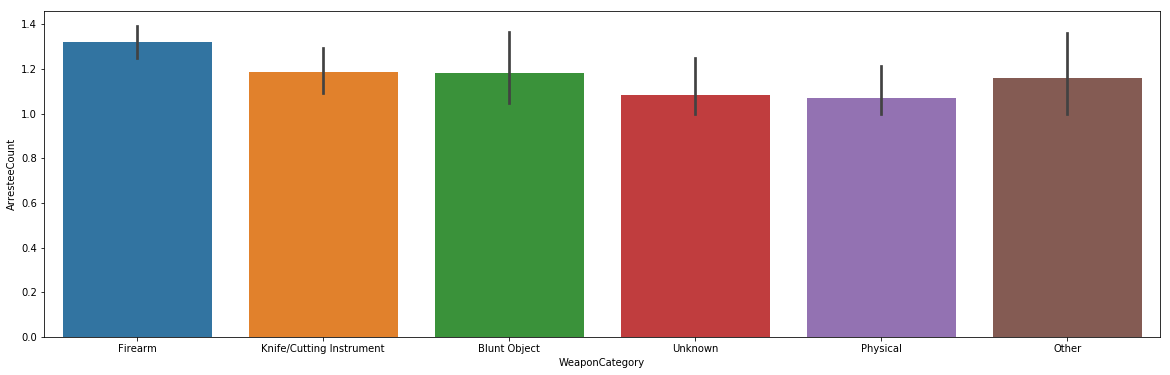

In [8]:
x_data=df_homicides['WeaponCategory']
y_data=df_homicides['ArresteeCount']
# title='OccurredMonth vs Section'
# _, ax = plt.subplots()
# ax.scatter(x_data, y_data, s = 10, color = 'blue', alpha = 0.75)
# ax.set_title(title)
# ax.set_xlabel('OccurredMonth')
# ax.set_ylabel('Section')
# plt.show()

plt.figure(figsize = (20, 6))
ax = sns.barplot(x=x_data, y=y_data, data=df_homicides)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


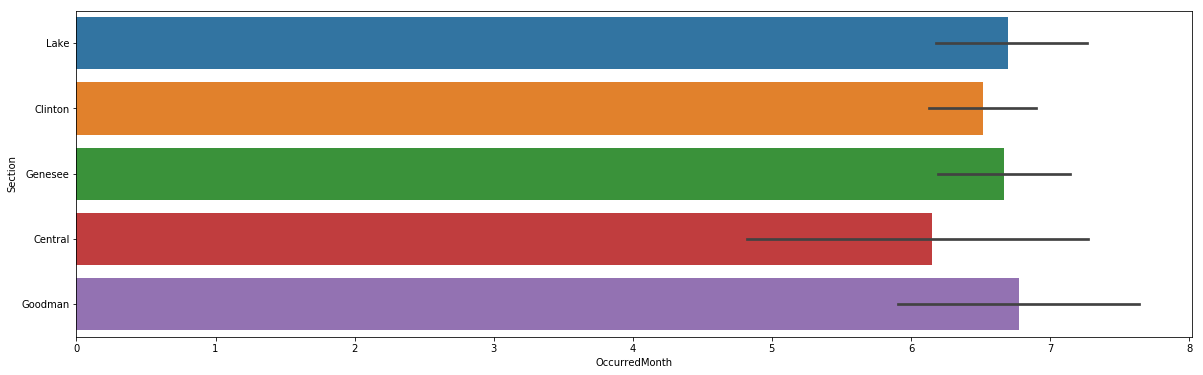

In [13]:
x_data=df_homicides['OccurredMonth']
y_data=df_homicides['Section']
# title='OccurredMonth vs Section'
# _, ax = plt.subplots()
# ax.scatter(x_data, y_data, s = 10, color = 'blue', alpha = 0.75)
# ax.set_title(title)
# ax.set_xlabel('OccurredMonth')
# ax.set_ylabel('Section')
# plt.show()

plt.figure(figsize = (20, 6))
ax = sns.barplot(x=x_data, y=y_data, data=df_homicides)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.show()



Week Days :  7
Friday       11832
Monday       11769
Wednesday    11418
Tuesday      11390
Saturday     11026
Thursday     10890
Sunday       10091
Name: Week_Name, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


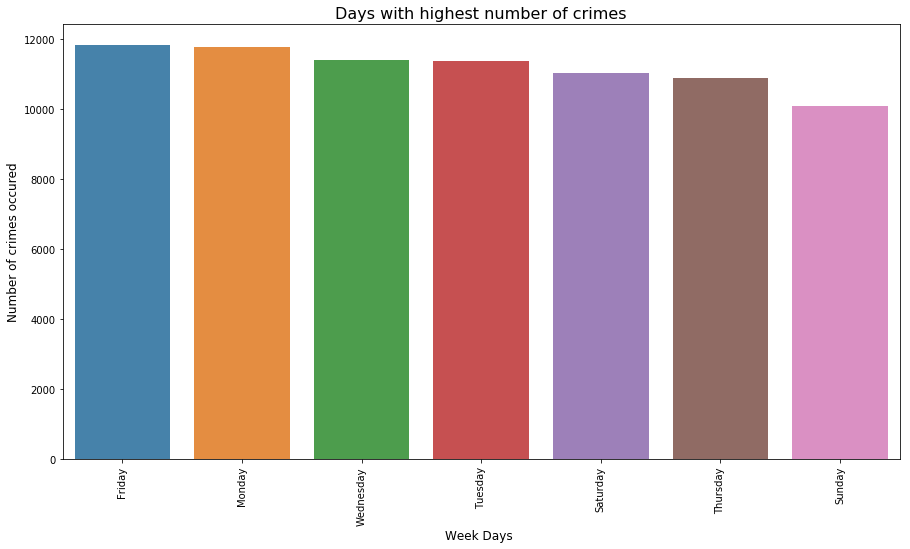

In [15]:
Week_days=feature_range['Week_Name']
print("Week Days : ", len(Week_days.unique()))
print(Week_days.value_counts().head(7))
Week_days_name = Week_days.value_counts().head(7)
plt.figure(figsize=(15,8))
sns.barplot(x=Week_days_name.index,y=Week_days_name.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Week Days ', fontsize=12)
plt.ylabel('Number of crimes occured', fontsize=12)
plt.title("Days with highest number of crimes", fontsize=16)
plt.show()
plt.savefig('WeekDays.png')


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


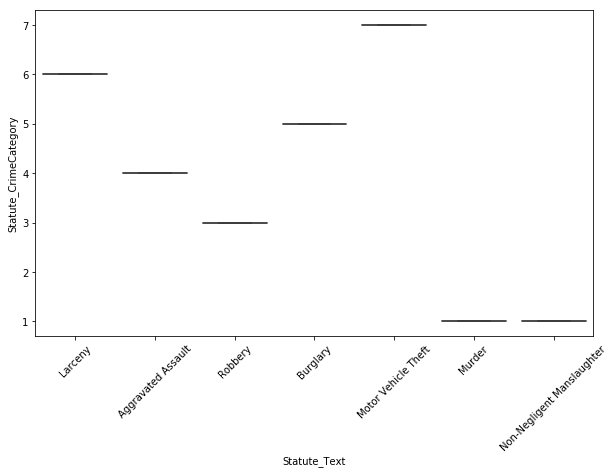

In [45]:
Week_days=feature_range['Week_Name']
Statute_Text=df['Statute_Text']
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x=Statute_Text, y=Statute_CrimeCategory, data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

 Shifts:  3
NightShift        34009
MorningShift      27347
AfternoonShift    17060
Name: Shift, dtype: int64


/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


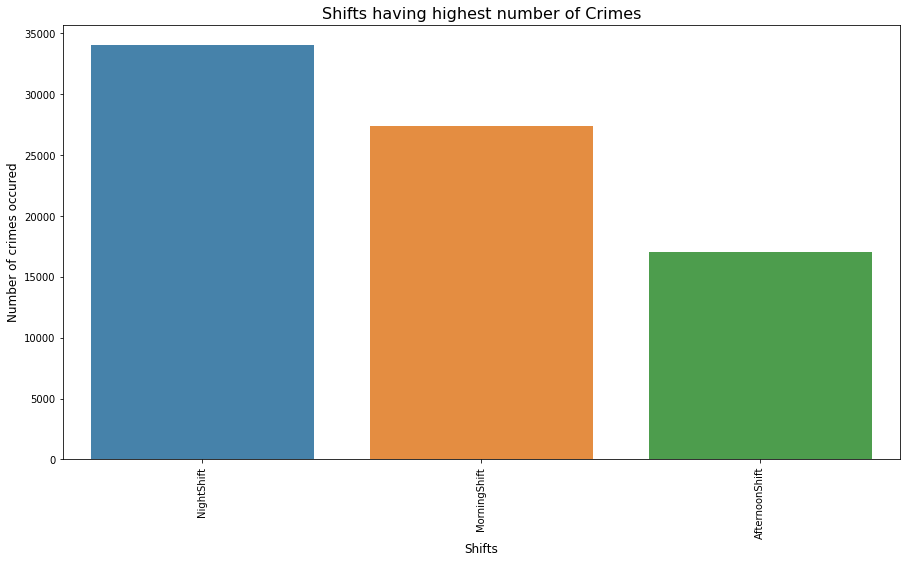

In [16]:
Shift=feature_range['Shift']
print(" Shifts: ", len(Shift.unique()))
print(Shift.value_counts().head(7))
Shift_time = Shift.value_counts().head(7)
plt.figure(figsize=(15,8))
sns.barplot(x=Shift_time.index,y=Shift_time.values,alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Shifts', fontsize=12)
plt.ylabel('Number of crimes occured', fontsize=12)
plt.title("Shifts having highest number of Crimes", fontsize=16)
plt.show()
plt.savefig('Shifts.png')

/Users/pallavi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/pallavi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pallavi/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


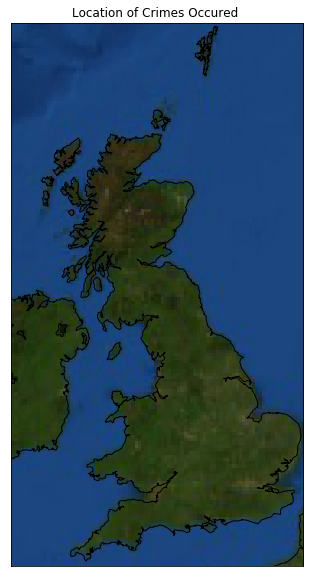

In [29]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

lon=df['X'].values
lat=df['Y'].values 
statute_CrimeCategory=df['Statute_CrimeCategory'].values
street=df['Geocode_Street'].values

df['lat_lon'] = list(zip(lon, lat)) # Creating tuples
df_2017 = df[df['OccurredThrough_Date_Year']==2017]



fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=-7.5600,llcrnrlat=49.7600,
            urcrnrlon=2.7800,urcrnrlat=60.840,
            resolution='i', # Set using letters, e.g. c is a crude drawing, f is a full detailed drawing
            projection='cass', # The projection style is what gives us a 2D view of the world for this
            lon_0=-4.36,lat_0=54.7, # Setting the central point of the image
            epsg=27700) # Setting the coordinate system we're using

m.bluemarble()
m.drawcoastlines()

for i in df_2017[0:500]['lat_lon']:
    x,y = i
    m.plot(x, y, marker = 'o', c='r', markersize=1, alpha=0.8, latlon=False)

plt.title("Location of Crimes Occured ")
plt.show()




In [5]:
#reading data
crimeData=pd.DataFrame()

#Here df is the dataframeset

#To see the info of the data frame 

crimeData['X']=df['X']
crimeData['Y']=df['Y']
crimeData['OBJECTID']=df['OBJECTID']
crimeData['Geocode_Address']=df['Geocode_Address']
crimeData['Geocode_Street']=df['Geocode_Street']
crimeData['Case_Number']=df['Case_Number']
crimeData['OccurredFrom_Date_Year']=df['OccurredFrom_Date_Year']
crimeData['OccurredFrom_Date_Month']=df['OccurredFrom_Date_Month']
crimeData['OccurredFrom_Time'] =df['OccurredFrom_Time']              
crimeData['OccurredFrom_Timestamp']= df['OccurredFrom_Timestamp']      
crimeData['OccurredThrough_Date_Year'] =df['OccurredThrough_Date_Year'] 
crimeData['OccurredThrough_Date_Month'] =df['OccurredThrough_Date_Month']
crimeData['OccurredThrough_Timestamp'] =df['OccurredThrough_Timestamp']
crimeData['Reported_Date_Year']=df['Reported_Date_Year']  
crimeData['Reported_Date_Month']=df['Reported_Date_Month'] 
crimeData['Reported_Time']=df['Reported_Time']
crimeData['Reported_Timestamp'] =df['Reported_Timestamp']
crimeData['Address_StreetFull'] =df['Address_StreetFull']
crimeData['Address_City'] =df['Address_City']
crimeData['Address_StreetFull'] =df['Address_StreetFull'] 
crimeData['Address_City'] =df['Address_City'] 
crimeData['Address_State'] =df['Address_State']   
crimeData['Patrol_Beat'] =df['Patrol_Beat']     
crimeData['Patrol_Section'] =df['Patrol_Section']
crimeData['Case_Status'] =df['Case_Status']
crimeData['Statute_Title']=df['Statute_Title']
crimeData['Case_Status'] =df['Case_Status']
crimeData['Statute_Section'] =df['Statute_Section']
crimeData['Statute_Subsection'] =df['Statute_Subsection']
crimeData['Statute_Degree'] =df['Statute_Degree']
crimeData['Statute_Class'] =df['Statute_Class']
crimeData['Statute_Text'] =df['Statute_Text']
crimeData['Statute_Description'] =df['Statute_Description'] 
crimeData['Statute_CrimeCategory'] =df['Statute_CrimeCategory']
crimeData['Weapon_Description'] =df['Weapon_Description']
crimeData['Larceny_Type'] =df['Larceny_Type']
crimeData['Location_Type'] =df['Location_Type']
crimeData['Geo_Beat'] =df['Geo_Beat']
crimeData['Geo_Section'] =df['Geo_Section']
crimeData['Geo_Section_Num'] =df['Geo_Section_Num']
crimeData['Statute_Category']=df['Statute_Category']

print(crimeData.info())
#ile_name='crimeData.csv'

#df.to_csv(file_name, sep='\t', encoding='utf-8')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77810 entries, 0 to 77809
Data columns (total 38 columns):
X                             77351 non-null float64
Y                             77351 non-null float64
OBJECTID                      77810 non-null int64
Geocode_Address               77351 non-null object
Geocode_Street                77810 non-null object
Case_Number                   77810 non-null object
OccurredFrom_Date_Year        77810 non-null int64
OccurredFrom_Date_Month       77810 non-null int64
OccurredFrom_Time             77810 non-null int64
OccurredFrom_Timestamp        77810 non-null object
OccurredThrough_Date_Year     77810 non-null int64
OccurredThrough_Date_Month    77810 non-null int64
OccurredThrough_Timestamp     77810 non-null object
Reported_Date_Year            77810 non-null int64
Reported_Date_Month           77810 non-null int64
Reported_Time                 77810 non-null int64
Reported_Timestamp            77810 non-null object
Address_Street

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


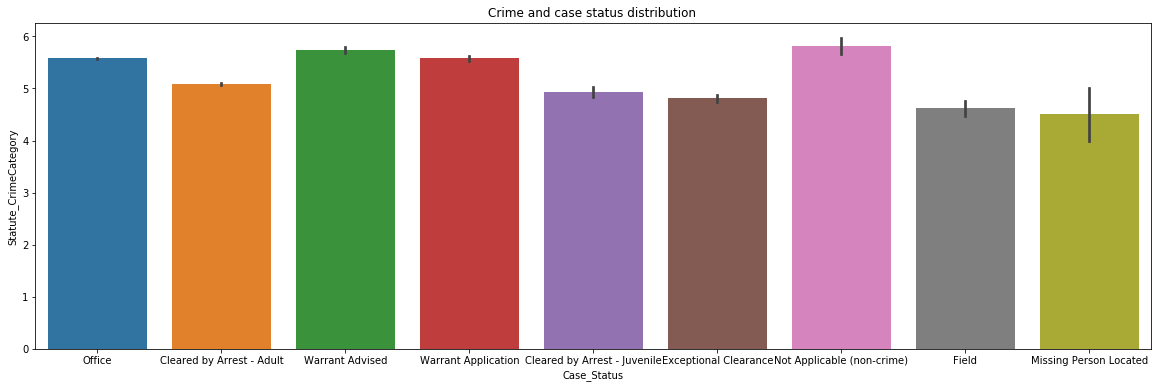

In [17]:
x_data=df['Case_Status']
y_data=df['Statute_CrimeCategory']
# title='OccurredMonth vs Section'
# _, ax = plt.subplots()
# ax.scatter(x_data, y_data, s = 10, color = 'blue', alpha = 0.75)
# ax.set_title(title)
# ax.set_xlabel('OccurredMonth')
# ax.set_ylabel('Section')
# plt.show()


plt.figure(figsize = (20, 6))
ax = sns.barplot(x=x_data, y=y_data, data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Crime and case status distribution ')
plt.show()
plt.savefig('Crime_casestatus.png')

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


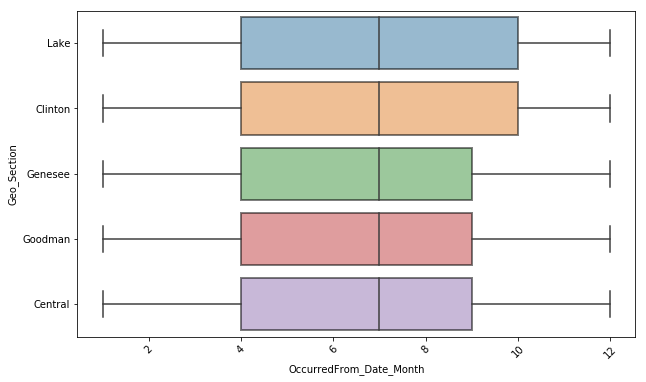

In [38]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='OccurredFrom_Date_Month', y='Geo_Section', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()



/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


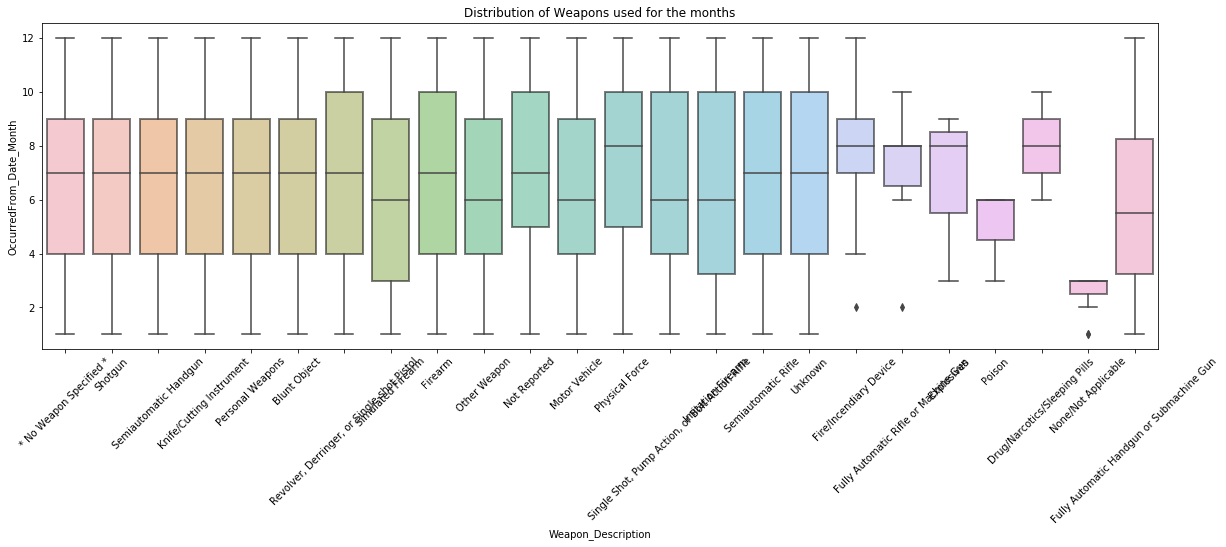

In [41]:
plt.figure(figsize = (20, 6))
ax = sns.boxplot(x='Weapon_Description', y='OccurredFrom_Date_Month', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Distribution of Weapons used for the months')
plt.xticks(rotation=45)
plt.show()

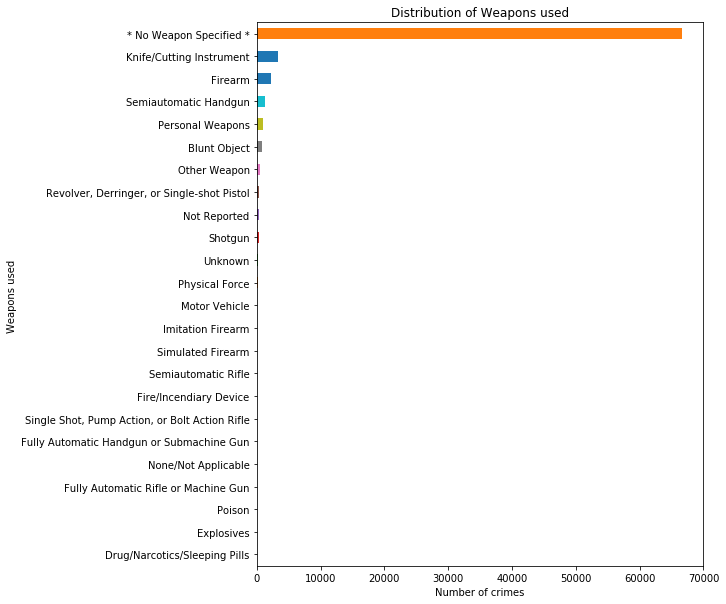

In [5]:
plt.figure(figsize=(8,10))
df.groupby([df['Weapon_Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Distribution of Weapons used')
plt.ylabel('Weapons used ')
plt.xlabel('Number of crimes')
plt.show()

/Users/pallavi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


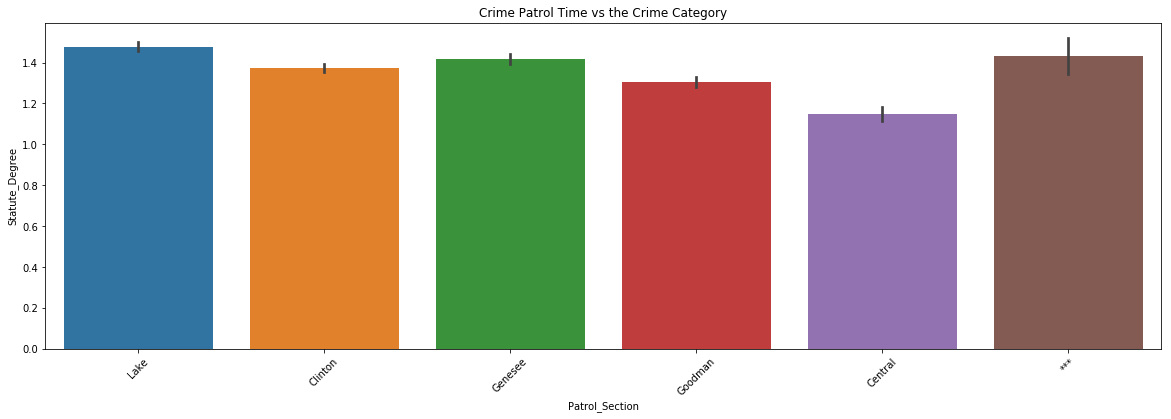

In [14]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x='Patrol_Section', y='Statute_Degree', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Crime Patrol Time vs the Crime Degree')
plt.xticks(rotation=45)
plt.show()



In [20]:
labels=crimeData['Statute_Text']
Log_Regrssion_dataframe=pd.DataFrame()
Log_Regrssion_dataframe=crimeData['Statute_CrimeCategory']
Log_Regrssion_dataframe=crimeData['Reported_Time']
Log_Regrssion_dataframe=crimeData['Reported_Date_Month']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Log_Regrssion_dataframe,labels , test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(type(x_train))

(58357,)
(58357,)
<class 'pandas.core.series.Series'>


In [24]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
predictions=np.where(predictions=='Larceny',1,predictions)
predictions=predictions.reshape(-1,1)
# Use score method to get accuracy of model
score = logisticRegr.score(predictions, y_test)
print(score*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


59.4355626382


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train) 
predictions=clf.predict(x_test)
accuracy_score=accuracy_score(y_test, predictions)
print(accuracy_score*100)

/Users/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


59.4355626382


In [51]:
Statute_Category=crimeData['Statute_Category']
print(Statute_Category.values)

['M' 'M' 'M' ..., 'F' 'F' 'M']


In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
cat_features = ['Geocode_Address','Geocode_Street','Address_StreetFull','Address_City','Patrol_Section',
                'Case_Status','Statute_Title','Statute_Section','Statute_Class','Statute_Text',
               'Statute_Description','Statute_CrimeCategory','Weapon_Description','Larceny_Type','Location_Type'
               ,'Geo_Beat','Geo_Section']

enc = preprocessing.LabelEncoder()
enc.fit(cat_features)
new_cat_features = enc.transform(cat_features)

new_cat_features = new_cat_features.reshape(-1, 1)
print(new_cat_features.shape)
ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
new_encoded_features=ohe.fit_transform(new_cat_features)


(17, 1)


In [66]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(new_encoded_features)



StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(new_encoded_features)
X = pca.transform(new_encoded_features)
print(X)

[[ -4.11249096e-02   1.57980224e-01   1.27994569e-02]
 [ -2.78576211e-02   2.71289015e-01   1.20809701e-01]
 [ -6.22105737e-02  -5.11152984e-02   5.12022973e-02]
 [  5.41156358e-18   1.22497763e-17   4.16086375e-18]
 [ -1.01637685e-02  -7.18869038e-02  -1.67742608e-01]
 [ -2.78644690e-02  -1.19273493e-01   4.20797866e-02]
 [ -1.22693137e-01  -7.84432083e-02  -8.26482646e-02]
 [  1.83786930e-01   2.94487538e-01  -8.01664738e-02]
 [ -1.32815713e-01  -3.29962046e-01  -5.61097375e-02]
 [ -2.50005157e-01   3.67208440e-02   2.56827532e-02]
 [ -1.78494848e-01  -4.93279063e-01   1.00919193e-01]
 [  8.04839651e-01  -1.00606747e-01   4.16220383e-01]
 [ -3.70947721e-01   6.82198929e-02   5.96971127e-01]
 [  1.19487694e-01  -2.71385428e-01  -2.14520188e-01]
 [ -9.16628971e-02   5.81503905e-01  -3.13542897e-02]
 [  6.97682974e-02   3.22613915e-02  -5.66272755e-01]
 [  1.37958242e-01   7.34893760e-02  -1.67870381e-01]]


In [69]:
import sklearn.pipeline as skpl
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
pipe = Pipeline([('pca', pca), ('logistic', clf)])
pipe.fit(features_train, la)
predictions = pipe.predict(features_valid)
